In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_theme()
sns.set_style('dark')

In [4]:
df = pd.read_csv('House Prediction.csv')
print(df.columns)
print('The total number of features:',df.shape[1])

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE',
       'INF_PRICE', '1+0.04', 'POWER(Z,Y)'],
      dtype='object')
The total number of features: 24


In [5]:
##Dropping Unwamted Features
df=df.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)

In [6]:
print("Total number of features in the data is:",df.shape[1])
pd.DataFrame(df.dtypes.value_counts()).T

Total number of features in the data is: 21


,object,float64,int64
0,9,9,3


In [8]:
df.shape

(7109, 21)

In [9]:
df.describe()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE,1+0.04,"POWER(Z,Y)"
count,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7.109000e+03,7.109000e+03,7.109000e+03,7109.000000
mean,1382.073006,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,1.089491e+07,1.767201e+07,1.040000e+00,1.621739
std,457.410902,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,3.768603e+06,6.310658e+06,3.330903e-14,0.141455
min,500.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.591355e+06,1.040000e+00,1.315932
25%,993.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06,1.323023e+07,1.040000e+00,1.539454
50%,1373.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.033505e+07,1.687515e+07,1.040000e+00,1.601032
75%,1744.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.299390e+07,2.098167e+07,1.040000e+00,1.731676
max,2500.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,4.354230e+07,1.040000e+00,2.025817


In [10]:
pd.DataFrame(df.isnull().sum()).T

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE,1+0.04,"POWER(Z,Y)"
0,0,0,0,1,5,0,0,0,0,0,...,0,0,0,0,0,48,0,0,0,0


In [13]:
#Filling null values
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].mean())
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].mean())
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())

df['N_BEDROOM'] = np.floor(df['N_BEDROOM'])
df['N_BATHROOM'] = np.floor(df['N_BATHROOM'])

In [14]:
pd.DataFrame(df.isnull().sum()).T

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE,1+0.04,"POWER(Z,Y)"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Spelling Corrections
df['PARK_FACIL'].replace(['Noo'],['No'],inplace=True)
df['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'],inplace=True)
df['UTILITY_AVAIL'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'],inplace=True)
df['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'],inplace=True)
df['SALE_COND'].replace(['Ab Normal','Partiall','PartiaLl','Adj Land'],['AbNormal','Partial','Partial','AdjLand'],inplace=True)
df['AREA'].replace(['Ana Nagar','Ann Nagar','Karapakam','Chrompt','Chrmpet','Chormpet','Adyr','Velchery','KKNagar','TNagar'],
['Anna Nagar','Anna Nagar','Karapakkam','Chrompet','Chrompet','Chrompet','Adyar','Velachery','KK Nagar','T Nagar'],
inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   N_BEDROOM      7109 non-null   float64
 4   N_BATHROOM     7109 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   object 
 7   PARK_FACIL     7109 non-null   object 
 8   DATE_BUILD     7109 non-null   object 
 9   BUILDTYPE      7109 non-null   object 
 10  UTILITY_AVAIL  7109 non-null   object 
 11  STREET         7109 non-null   object 
 12  MZZONE         7109 non-null   object 
 13  QS_ROOMS       7109 non-null   float64
 14  QS_BATHROOM    7109 non-null   float64
 15  QS_BEDROOM     7109 non-null   float64
 16  QS_OVERALL     7109 non-null   float64
 17  SALES_PRICE    7109 non-null   int64  
 18  INF_PRIC

In [17]:
#CREATING NEW FEATURES FOR DATE_SALE & DATE_BUILD.
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
pd.DataFrame(df.dtypes.value_counts()).T

C:\Users\VIPLA\AppData\Local\Temp\ipykernel_12104\21634831.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
C:\Users\VIPLA\AppData\Local\Temp\ipykernel_12104\21634831.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])


,float64,object,int64,datetime64[ns]
0,9,7,3,2


In [20]:
#DROPPING THE FEATURES WHICH MAKE NO SENSE
df.drop(['DATE_SALE','DATE_BUILD','1+0.04','POWER(Z,Y)'],axis=1,inplace=True)

In [21]:
#DATA VISUALISATION
A=df['AREA'].groupby(df['AREA']).count()
B=df['AREA'].groupby(df['BUILDTYPE']).count()
C=df['AREA'].groupby(df['UTILITY_AVAIL']).count()
D=df['AREA'].groupby(df['STREET']).count()
E=df['AREA'].groupby(df['MZZONE']).count()
F=df['AREA'].groupby(df['PARK_FACIL']).count()

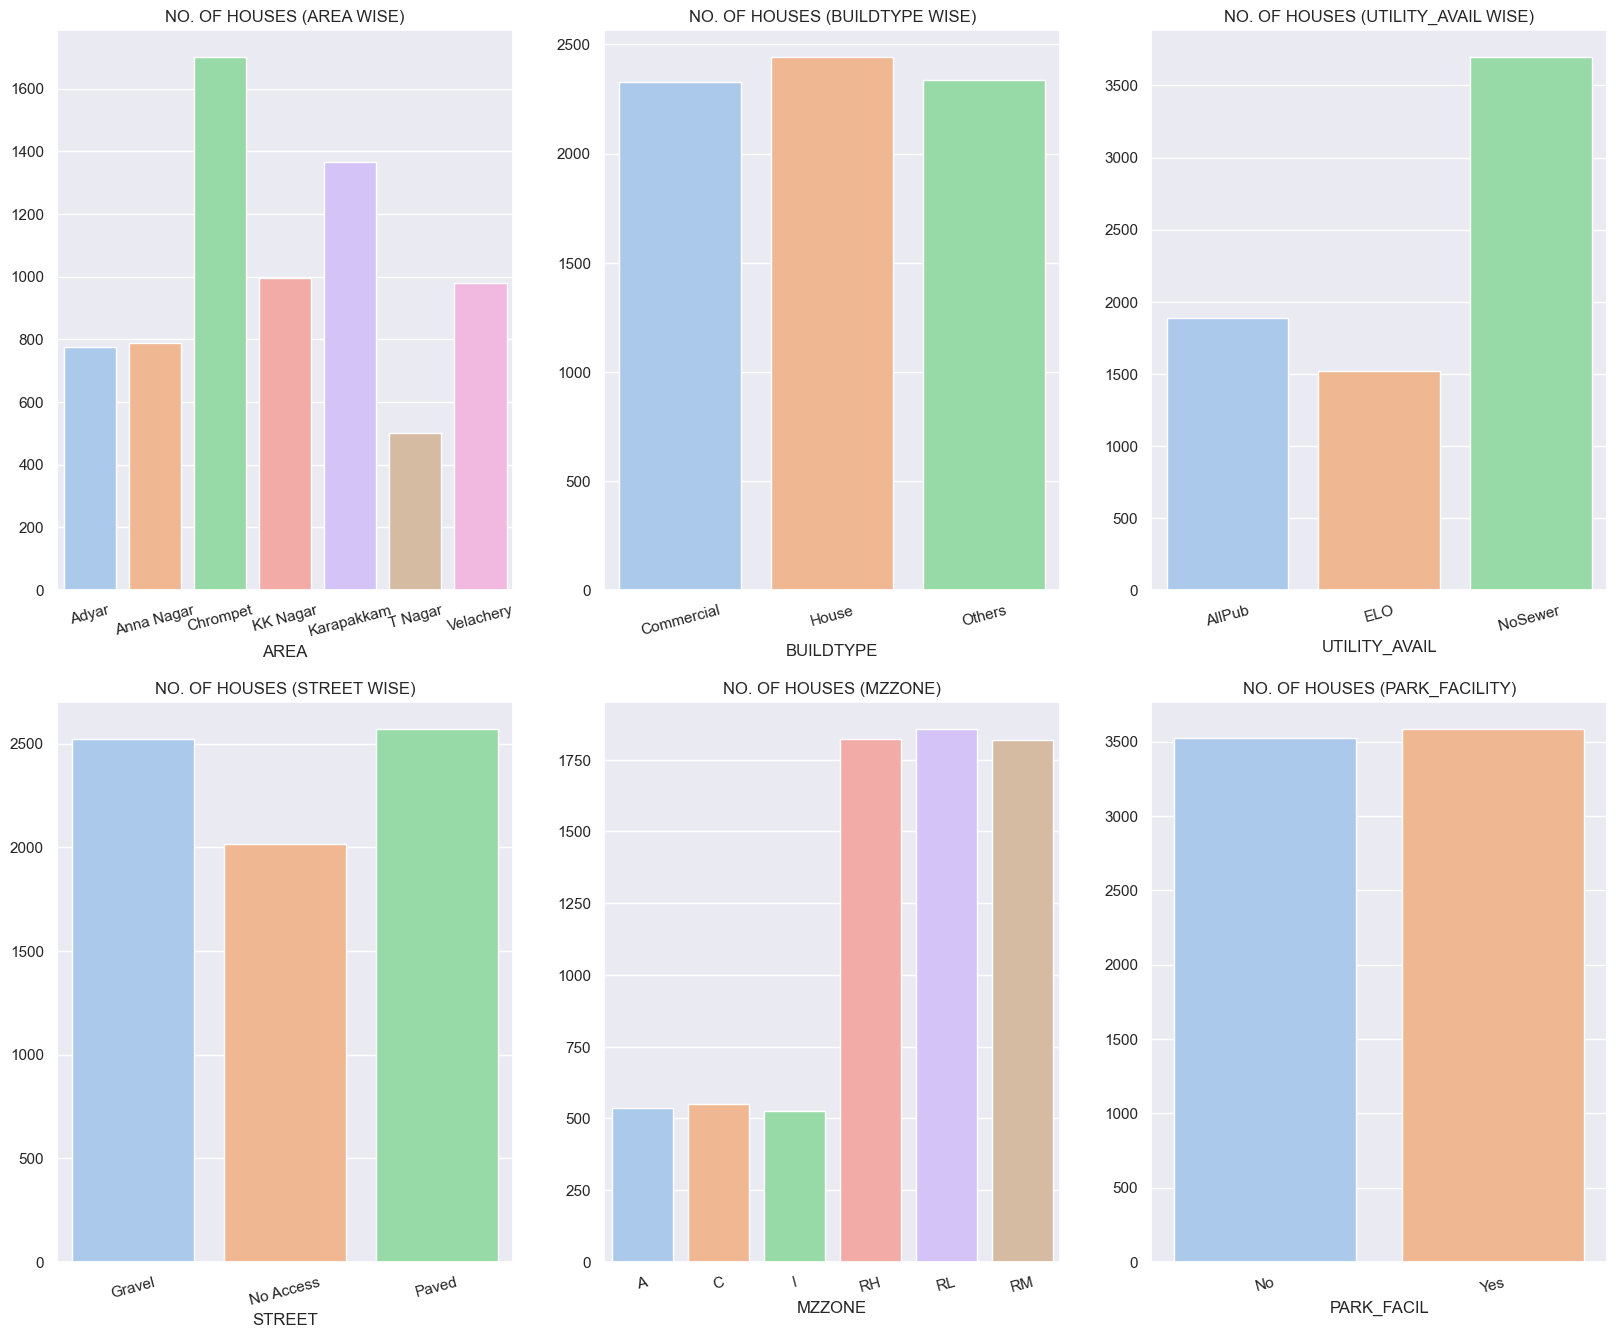

In [23]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x=A.index,y=A.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (AREA WISE)')
plt.subplot(232)
sns.barplot(x=B.index,y=B.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x=C.index,y=C.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x=D.index,y=D.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (STREET WISE)')
plt.subplot(235)
sns.barplot(x=E.index,y=E.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (MZZONE)')
plt.subplot(236)
sns.barplot(x=F.index,y=F.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (PARK_FACILITY)')
plt.show()

In [24]:
#BUILDTYPE - Number of "House" building type is higher than "Commercial" and "Other" building type.
#AREA - Number of building in "Chrompet" is higher than other area's. "T Nagar" has low number of building when compared with other area's.
#UTILITY_AVAILABLE - "NoSewer" building is higher than "ALLPUB" and "ELO" building.

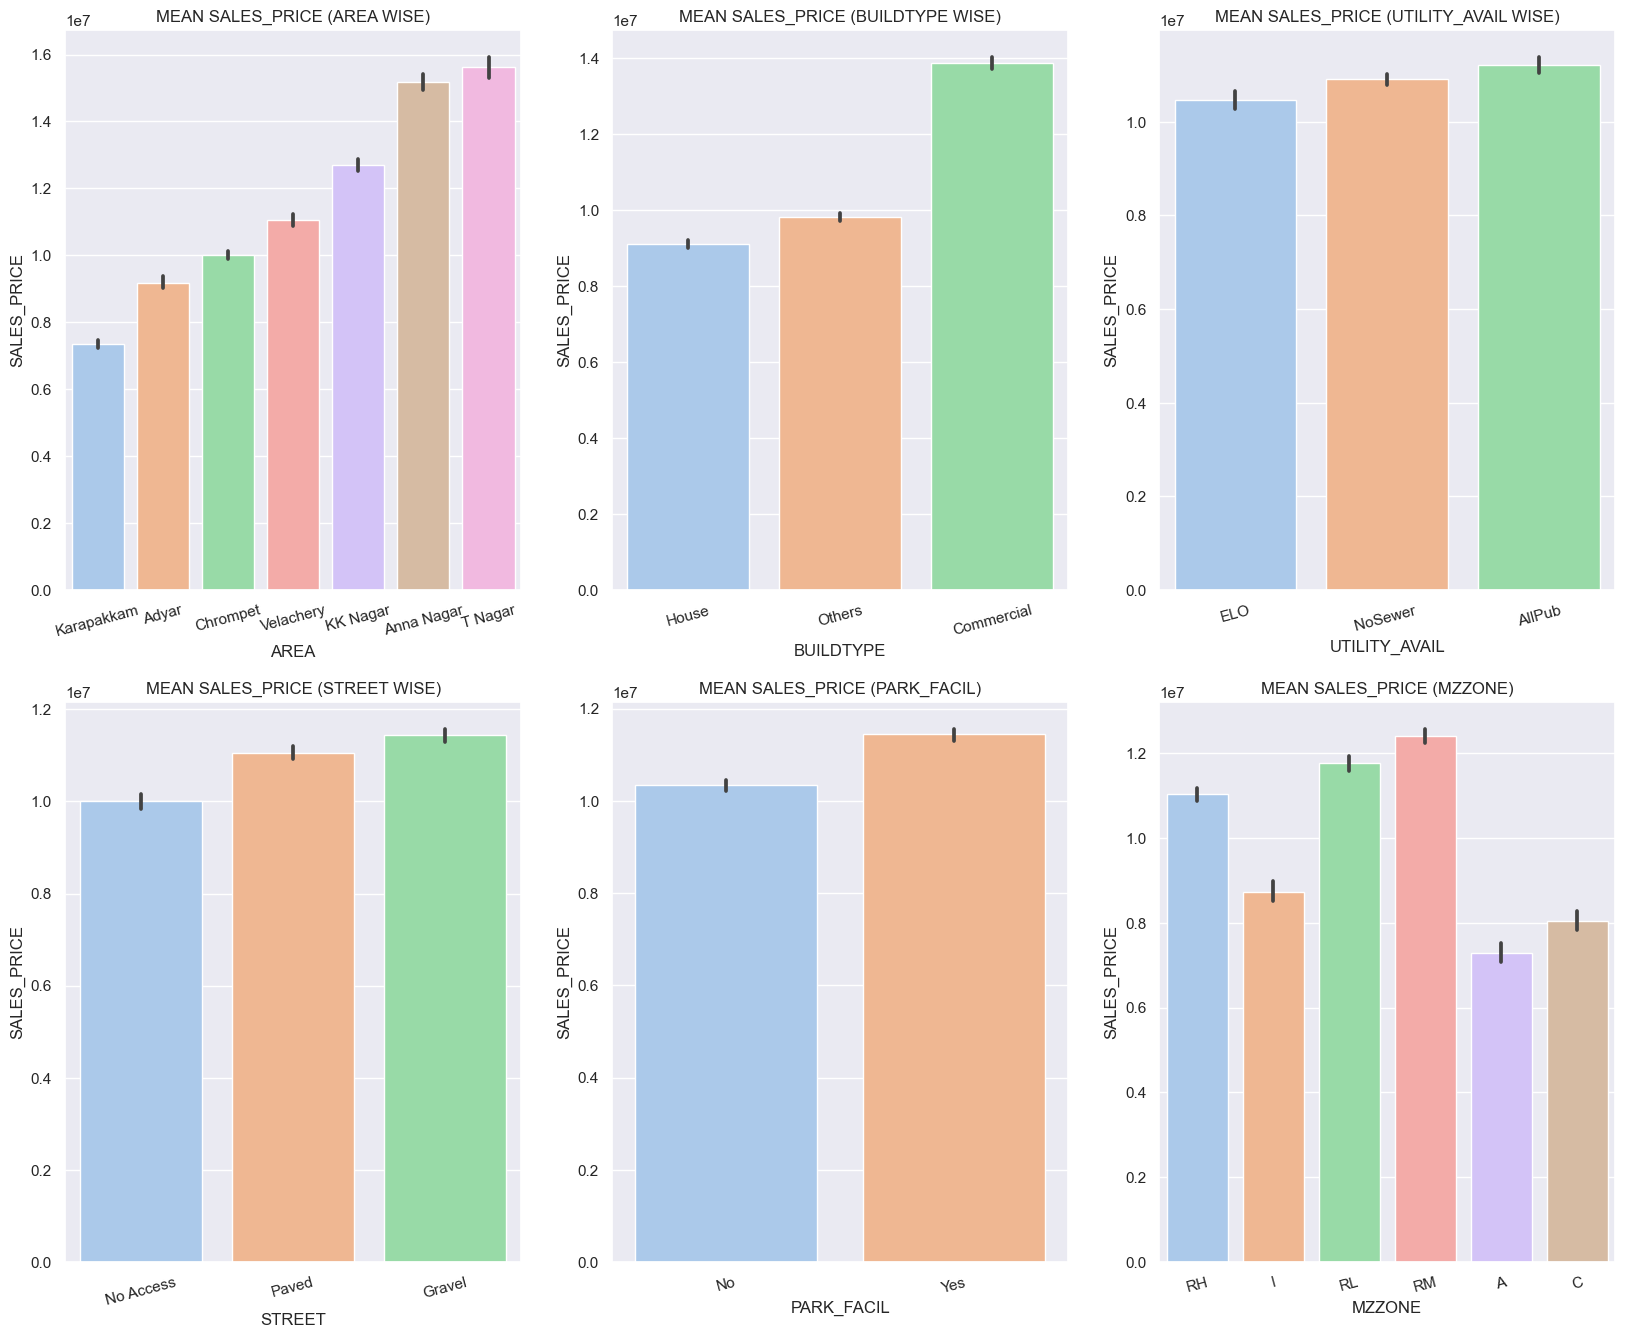

In [25]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (AREA WISE)')
plt.subplot(232)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (STREET WISE)')
plt.subplot(235)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (PARK_FACIL)')
plt.subplot(236)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (MZZONE)')
plt.show()

In [26]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE',
       'INF_PRICE'],
      dtype='object')

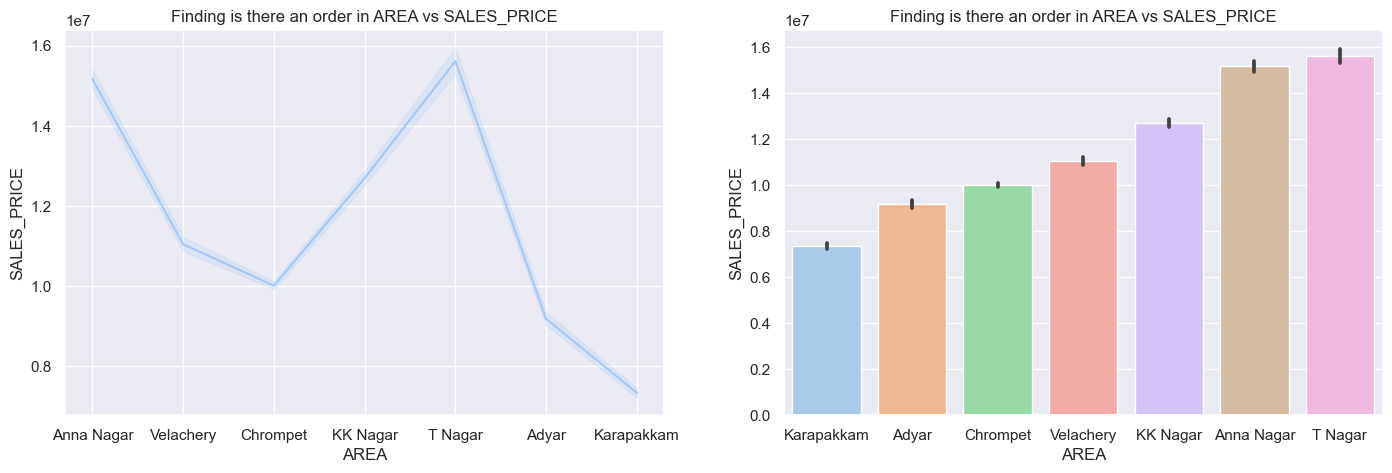

In [27]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['AREA'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in AREA vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('Finding is there an order in AREA vs SALES_PRICE')
plt.show()

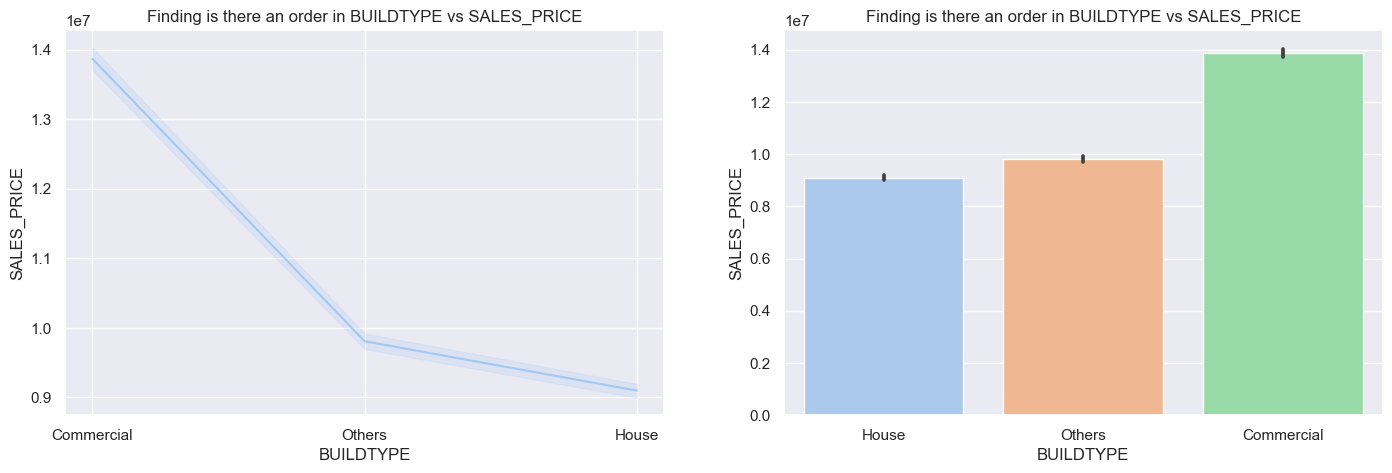

In [28]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['BUILDTYPE'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.show()

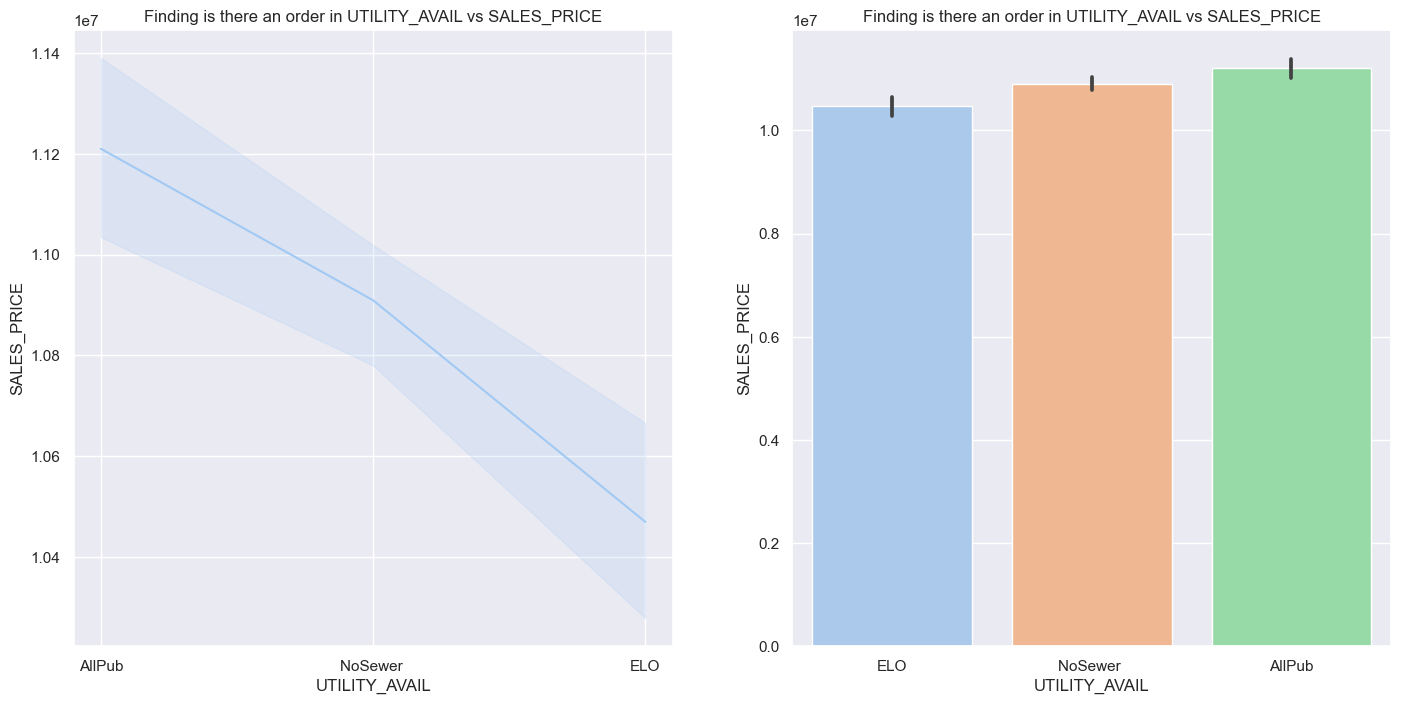

In [29]:
plt.figure(figsize=(17,8))
plt.subplot(121)
sns.lineplot(x=df['UTILITY_AVAIL'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in UTILITY_AVAIL vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('Finding is there an order in UTILITY_AVAIL vs SALES_PRICE')
plt.show()

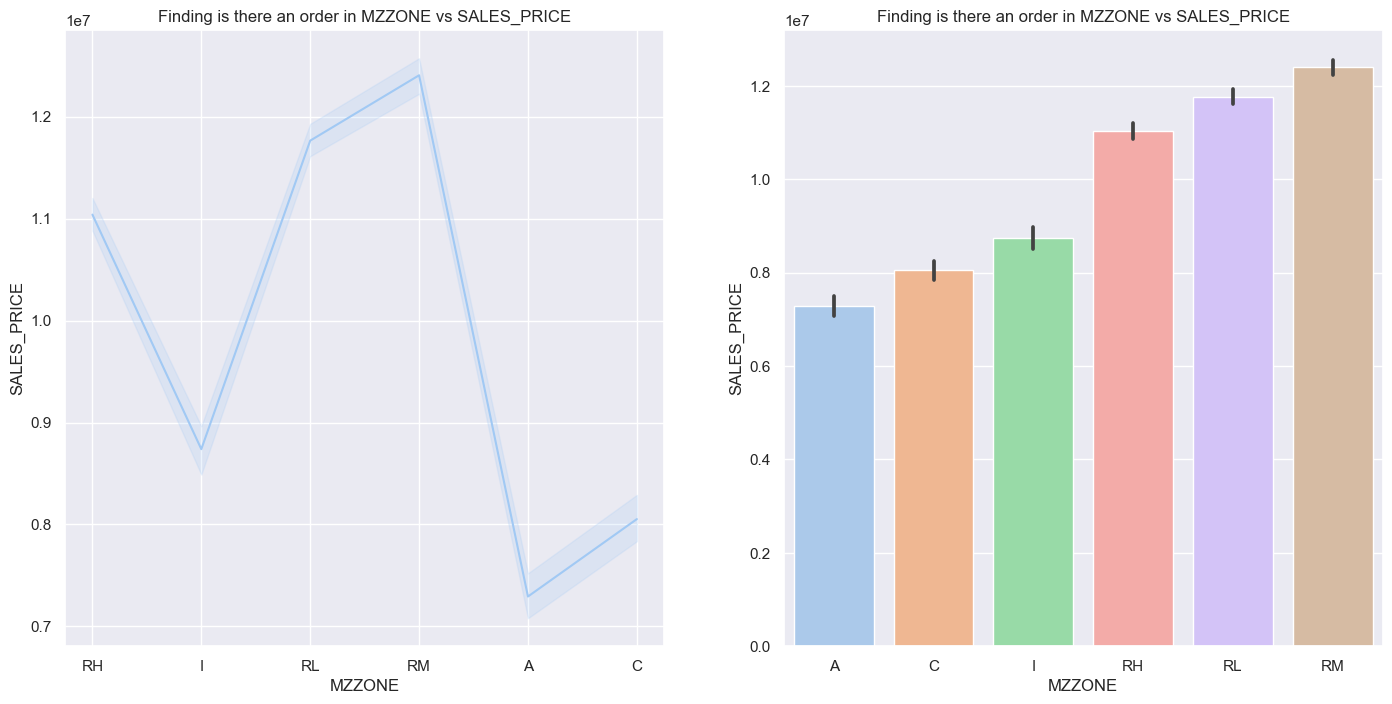

In [30]:
plt.figure(figsize=(17,8))
plt.subplot(121)
sns.lineplot(x=df['MZZONE'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in MZZONE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('Finding is there an order in MZZONE vs SALES_PRICE')
plt.show()

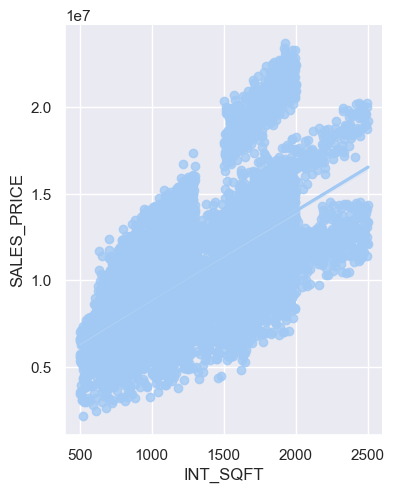

In [33]:
#REALTION WITH TARGET VARIABLE
sns.pairplot(df,x_vars=["INT_SQFT"], y_vars=["SALES_PRICE"],
             height=5,aspect=.8, kind="reg")
plt.show()

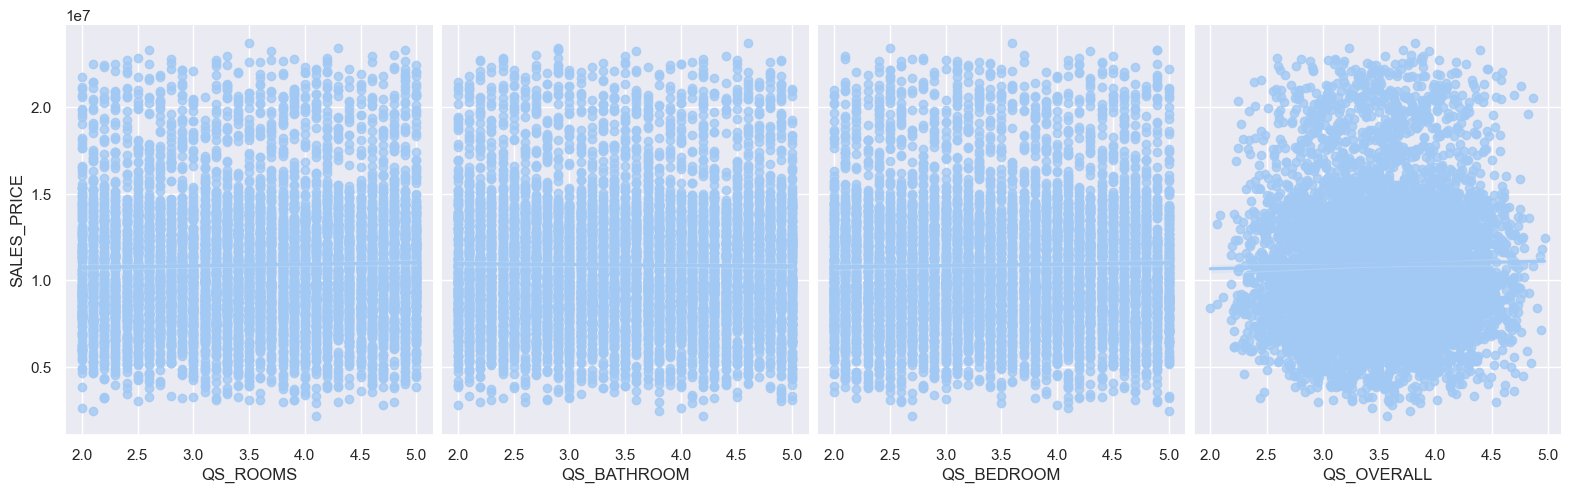

In [34]:
sns.pairplot(df,x_vars=["QS_ROOMS", "QS_BATHROOM","QS_BEDROOM","QS_OVERALL"], y_vars=["SALES_PRICE"],
             height=5, aspect=.8, kind="reg")
plt.show()

In [35]:
#In above graph i have checked whether if there is a linear relationship with target_variable('SALES_PRICE').
#Only "INT_SQFT" has the clear linear relation with the target_variable('SALES_PRICE'), others are flatten.

In [39]:
mean=df.groupby('AREA')['SALES_PRICE'].mean()
mean_=mean.values
max=df.groupby('AREA')['SALES_PRICE'].max()
max_=max.values
min=df.groupby('AREA')['SALES_PRICE'].min()
min_=min.values
median=df.groupby('AREA')['SALES_PRICE'].median()
median_=min.values
Area_mmm=pd.DataFrame([min_,mean_,median_,max_],columns=mean.index,index=['Minimun_Sales_Price','Average_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']).T
Area_mmm["AREA"]=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]

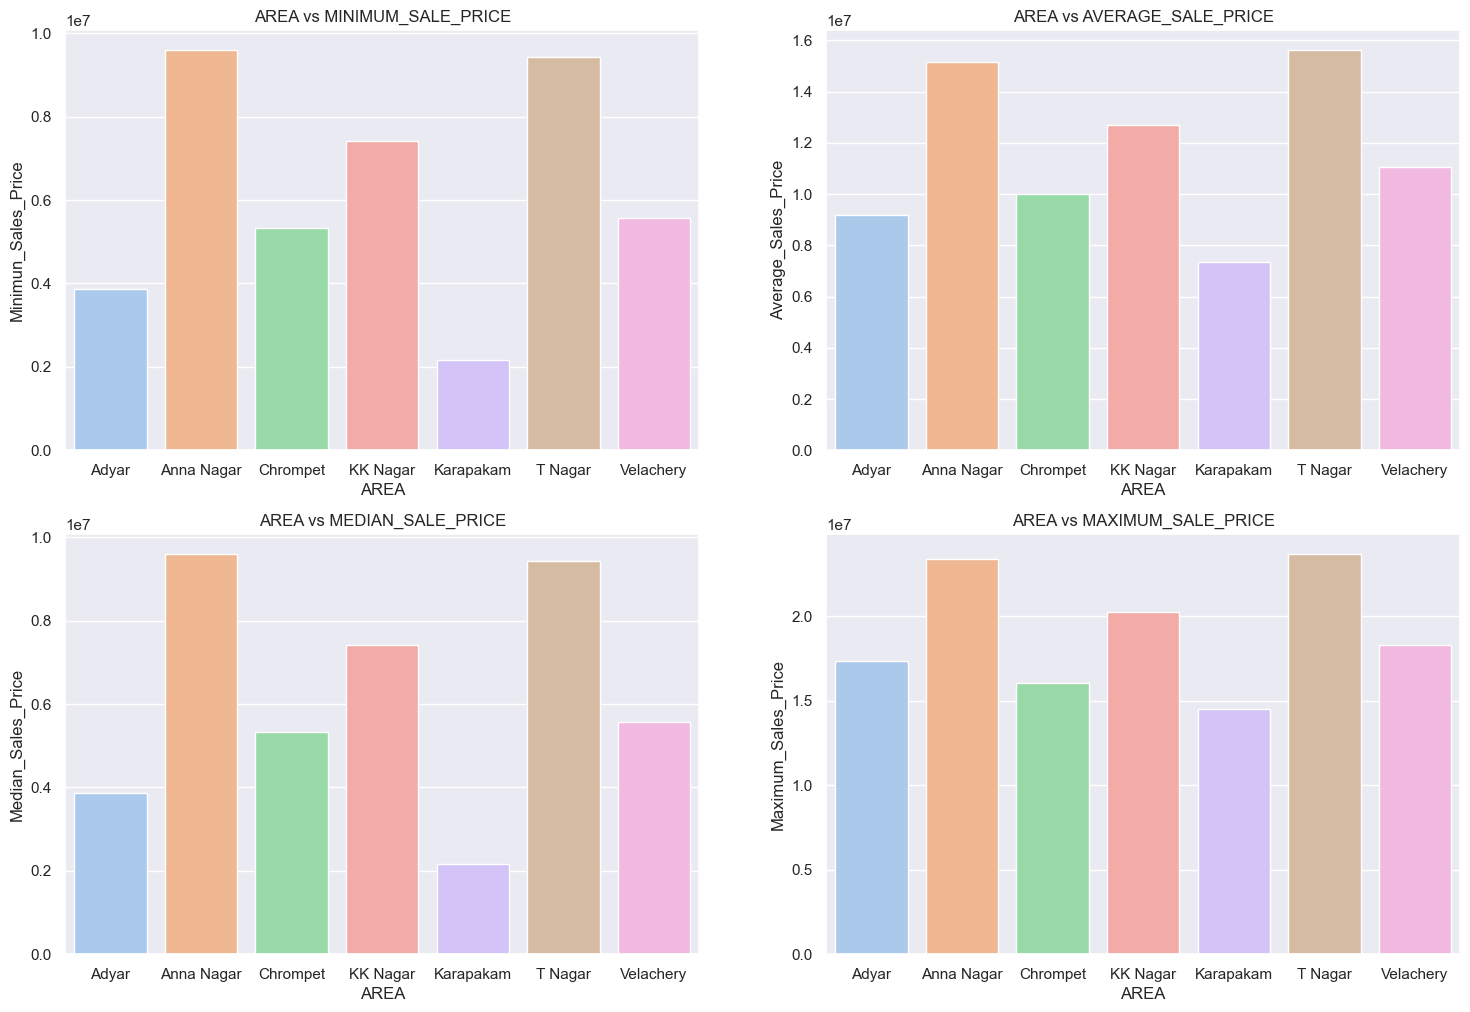

In [40]:
plt.figure(figsize=(18,12))
plt.subplot(221)
sns.barplot(x='AREA',y='Minimun_Sales_Price',data=Area_mmm)
plt.title('AREA vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x='AREA',y='Average_Sales_Price',data=Area_mmm)
plt.title('AREA vs AVERAGE_SALE_PRICE')
plt.subplot(223)
sns.barplot(x='AREA',y='Median_Sales_Price',data=Area_mmm)
plt.title('AREA vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x='AREA',y='Maximum_Sales_Price',data=Area_mmm)
plt.title('AREA vs MAXIMUM_SALE_PRICE')
plt.show()

In [41]:
mean=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].mean())
median=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].median())
max=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].max())
min=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].min())

In [42]:
mmm_df = pd.concat([min,mean['SALES_PRICE'].rename('Average'),median['SALES_PRICE'].rename('Median'),max['SALES_PRICE'].rename('Maximum')],axis=1)
column =['Minimum','Average','Median','Maximum']
mmm__df = pd.DataFrame(mmm_df)
mmm__df.rename(columns={'SALES_PRICE':'Minimum'},inplace=True)
mmm__df['BUILDTYPE']=['Commercial','Commercial','Commercial','Commercial','Commercial','Commercial','Commercial',
                      'House','House','House','House','House','House','House',
                      'Others','Others','Others','Others','Others','Others','Others']
mmm__df['AREA']=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]

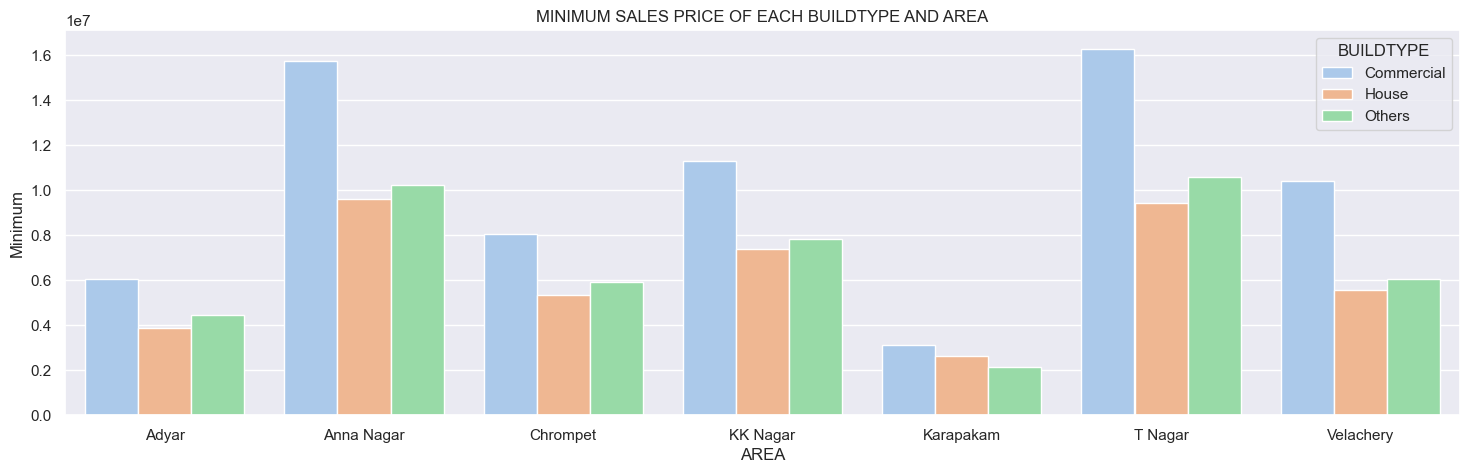

In [43]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Minimum',data=mmm__df,hue='BUILDTYPE')
plt.title('MINIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

In [44]:
# RESPECTIVE WITH MINIMUM PRICE OF EACH AREA.
#COMMERCIAL - (LOW - HIGH) - Karapakkam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. "T Nagar" is the first highest according to the "Sales_Price".
#HOUSE - (LOW - HIGH) - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".
#OTHERS - (LOW - HIGH) - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".

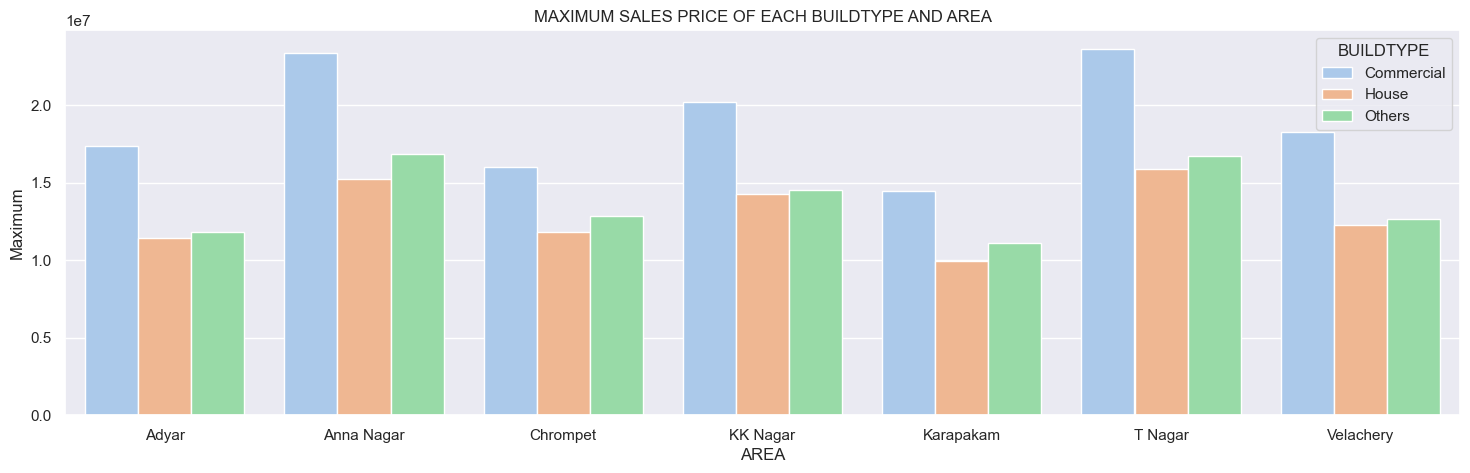

In [45]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Maximum',data=mmm__df,hue='BUILDTYPE')
plt.title('MAXIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

In [46]:
#- RESPECTIVE WITH MAXIMUM PRICE OF EACH AREA.
#COMMERCIAL - (LOW - HIGH) - Karapakkam area has the lowest price when compared with other area's. Followed with ["Chrompet","Adyar","Velachery","KK Nagar","Anna Nagar","T Nagar"]. "T Nagar" is the first highest according to the "Sales_Price".
#HOUSE - (LOW - HIGH) - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar""Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".
#OTHERS - (LOW - HIGH) - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".

In [47]:
#ENCODING THE CATEGORICAL FEATURES
df.head(2)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE
0,Anna Nagar,1986,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,40676975.91
1,Velachery,1855,3.0,2.0,5,Family,No,Others,NoSewer,Paved,I,4.7,3.9,3.6,4.010,9630290,15418404.56


In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [49]:
df['PARK_FACIL']=le.fit_transform(df['PARK_FACIL'])
df['AREA']=le.fit_transform(df['AREA'])
df['BUILDTYPE']=le.fit_transform(df['BUILDTYPE'])
df['SALE_COND']=le.fit_transform(df['SALE_COND'])
df['UTILITY_AVAIL']=le.fit_transform(df['UTILITY_AVAIL'])
df['STREET']=le.fit_transform(df['STREET'])
df['MZZONE']=le.fit_transform(df['MZZONE'])

In [50]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,INF_PRICE
0,1,1986,2.0,1.0,5,0,0,0,0,0,3,4.9,4.2,2.5,3.765,21717770,40676975.91
1,6,1855,3.0,2.0,5,2,0,2,2,2,2,4.7,3.9,3.6,4.010,9630290,15418404.56
2,2,1220,2.0,1.0,4,4,0,0,2,1,3,4.5,2.6,3.1,3.320,12394750,16963071.24
3,2,1167,1.0,1.0,3,4,0,2,0,1,4,3.6,2.1,2.5,2.670,8488790,15287831.22
4,6,1847,3.0,2.0,5,2,0,0,0,0,5,2.4,4.5,2.1,3.260,16800250,31466553.17


In [51]:
#FEATURE IMPORTANCE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr

In [52]:
X=df.drop(['SALES_PRICE','INF_PRICE'],axis=1)
y=df['SALES_PRICE']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X=df.drop(['SALES_PRICE','INF_PRICE'],axis=1)
y=df['SALES_PRICE']

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 15), (1422, 15), (5687,), (1422,))

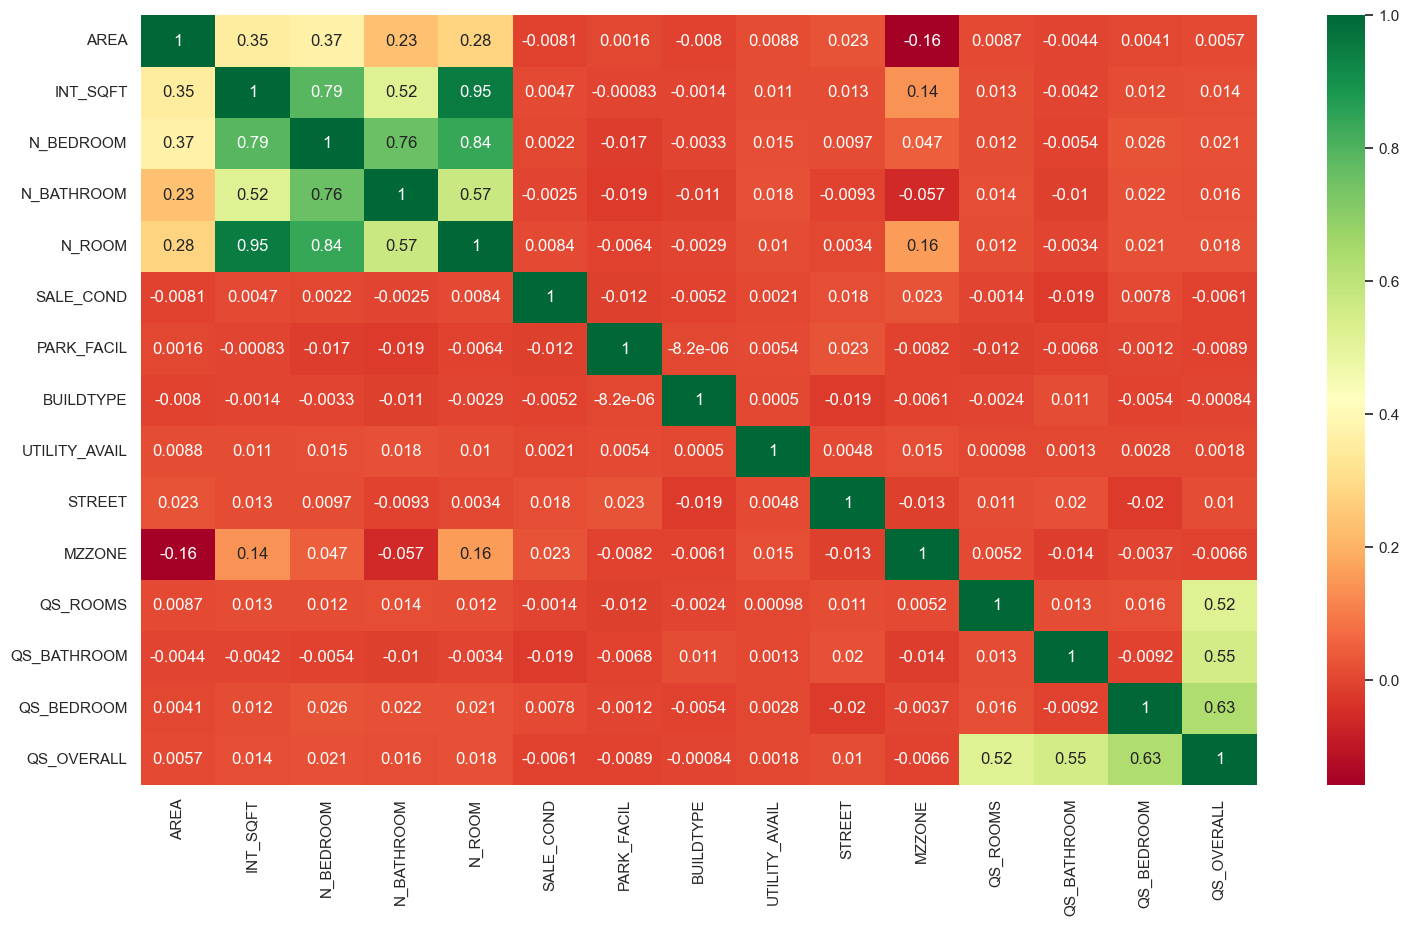

In [56]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(18,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True,cmap='RdYlGn')
plt.show()

In [59]:
#Machine Learning Model
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

In [60]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [61]:
lr_y_pred=lr_model.predict(X_test)

In [64]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [65]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve

In [66]:
print(r2_score(y_test,lr_y_pred))

0.7924773596197351
